Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("Sales.csv")

Getting info about Dataset

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Checking Null Values in Dataset

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Taking care of Duplicate Values

In [10]:
data.duplicated().any()

False

Handling Missing Values

Item_Weight

In [13]:
mean_weight=data['Item_Weight'].mean()
median_weight=data['Item_Weight'].median()

In [14]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [15]:
print("Original weight variable variance",data['Item_Weight'].var())
print("Item weight variable variance after mean imputation",data['Item_Weight_mean'].var())
print("Item weight variable variance after median imputation",data['Item_Weight_median'].var())

Original weight variable variance 21.56168825983637
Item weight variable variance after mean imputation 17.860121735060453
Item weight variable variance after median imputation 17.869561454073366


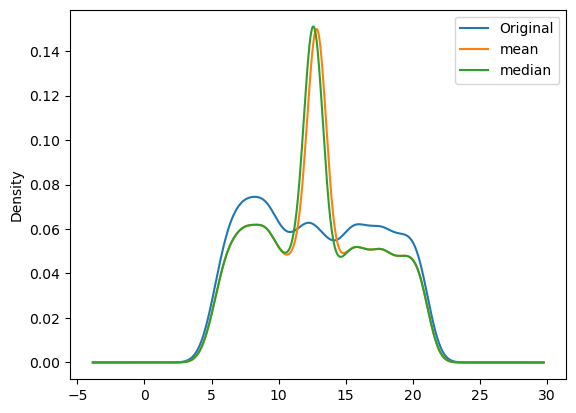

In [16]:
data['Item_Weight'].plot(kind='kde',label="Original")

data['Item_Weight_mean'].plot(kind='kde',label="mean")

data['Item_Weight_median'].plot(kind='kde',label="median")

plt.legend()
plt.show()

<Axes: >

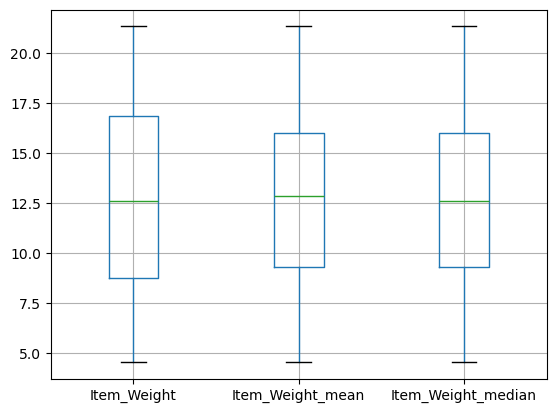

In [17]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [18]:
data['Item_Weight_Interpolate']=data['Item_Weight'].interpolate(method='linear')

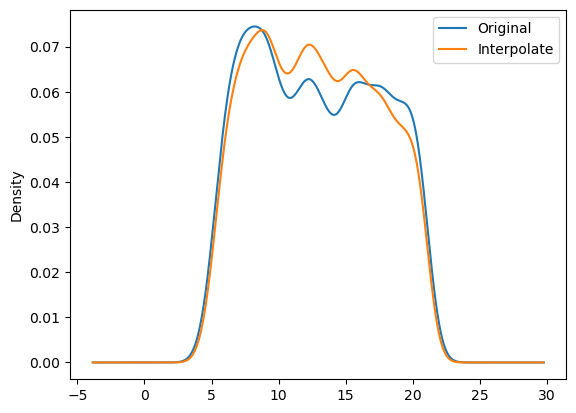

In [19]:
data['Item_Weight'].plot(kind='kde',label="Original")

data['Item_Weight_Interpolate'].plot(kind='kde',label="Interpolate")

plt.legend()
plt.show()

Multivariate Imputaion

In [21]:
from sklearn.impute import KNNImputer

In [22]:
knn=KNNImputer(n_neighbors=10,weights='distance')

In [23]:
data['knn_impute']=knn.fit_transform(data[['Item_Weight']]).ravel()

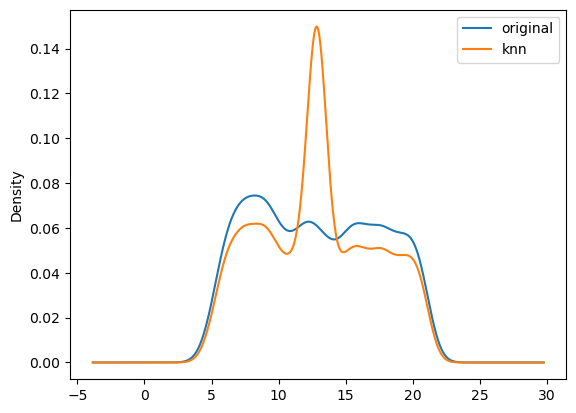

In [24]:
data['Item_Weight'].plot(kind='kde',label='original')
data['knn_impute'].plot(kind='kde',label='knn')
plt.legend()
plt.show()


In [25]:
data=data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_impute'],axis=1)

In [26]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Interpolate         0
dtype: int64

Outlet_Size

In [28]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [29]:
mode_outlet=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [30]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [31]:
missing_values=data['Outlet_Size'].isnull()

In [32]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [33]:
data.loc[missing_values,'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [34]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Interpolate      0
dtype: int64

Item_Fat_Content

In [36]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_Interpolate'],
      dtype='object')

In [37]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [38]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [39]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

Item_Visibility

In [41]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [42]:
data['Item_Visibility_Interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [43]:
data['Item_Visibility_Interpolate'].value_counts()

Item_Visibility_Interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

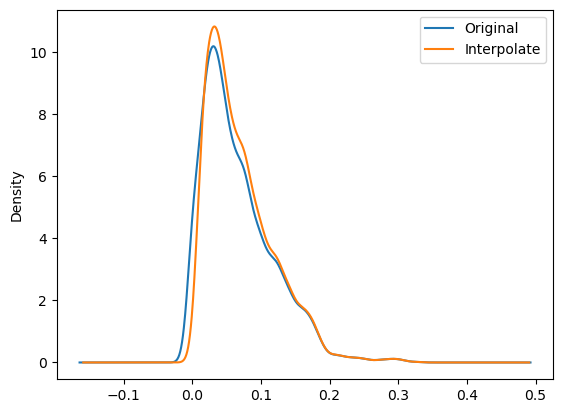

In [44]:
data['Item_Visibility'].plot(kind='kde',label='Original')
data['Item_Visibility_Interpolate'].plot(kind='kde',label='Interpolate')
plt.legend()
plt.show()


In [45]:
data=data.drop('Item_Visibility',axis=1)

Item_Type

In [47]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Item_Identifier

In [49]:
data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [50]:
data['Item_Identifier']=data['Item_Identifier'].apply(lambda x:x[:2])

In [51]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

Outlet_Establishment_Year

In [53]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [54]:
import datetime as dt

In [55]:
current_year=dt.datetime.today().year

In [56]:
data['Outlet_Age']=current_year-data['Outlet_Establishment_Year']

In [57]:
data=data.drop('Outlet_Establishment_Year',axis=1)

Handling Categorical Columns

In [59]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded=data.copy()

cat_cols=data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe=OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [60]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_Interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,26


In [61]:
X=data_encoded.drop('Item_Outlet_Sales',axis=1)
y=data_encoded['Item_Outlet_Sales']

Random Forest Regressior

In [63]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100,random_state=42)
scores=cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


XGBRFRegressior

In [65]:
from xgboost import XGBRFRegressor

xg=XGBRFRegressor(n_estimators=100,random_state=42)

scores=cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


XGBRFRegressor Feature Importances

In [67]:
xg=XGBRFRegressor(n_estimators=100,random_state=42)
xg1=xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_Age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_Interpolate,0.002493
8,Item_Weight_Interpolate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


In [68]:
['Outlet_Location_Type','Item_Visibility_Interpolate','Item_Weight_Interpolate','Item_Type','Item_Identifier','Item_Fat_Content']

['Outlet_Location_Type',
 'Item_Visibility_Interpolate',
 'Item_Weight_Interpolate',
 'Item_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [69]:
from xgboost import XGBRFRegressor

xg=XGBRFRegressor(n_estimators=100,random_state=42)

scores=cross_val_score(xg1,X.drop(['Outlet_Location_Type','Item_Visibility_Interpolate','Item_Weight_Interpolate','Item_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [70]:
final_data=X.drop(['Outlet_Location_Type','Item_Visibility_Interpolate','Item_Weight_Interpolate','Item_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [71]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,26
1,48.2692,3.0,1.0,2.0,16
2,141.6180,9.0,1.0,1.0,26
3,182.0950,0.0,2.0,0.0,27
4,53.8614,1.0,0.0,1.0,38
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,38
8519,108.1570,7.0,2.0,1.0,23
8520,85.1224,6.0,2.0,1.0,21
8521,103.1332,3.0,1.0,2.0,16


Best Model

In [73]:
from xgboost import XGBRFRegressor

In [74]:
xg_final=XGBRFRegressor()

In [75]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [77]:
X_train,X_test,y_train,y_test=train_test_split(final_data,y,test_size=0.2,random_state=42)

In [78]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [79]:
y_pred=xg_final.predict(X_test)

In [80]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

Prediction on Unseen Data

In [82]:
pred=xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [83]:
print(f"Sales Value is between {pred-713.95} and {pred+713.95}")

Sales Value is between 1353.13642578125 and 2781.03642578125


Save Model Using Joblib

In [85]:
import joblib

In [86]:
joblib.dump(xg_final,'final_model')

['final_model']

In [87]:
model=joblib.load('final_model')

In [88]:
pred=model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864
